In [1]:
"""
Created on Thu Mar  8 21:36:37 2018

@author: Claudio
"""

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
from pandas import DataFrame
import os
import sys
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from pandas.tools.plotting import autocorrelation_plot
import matplotlib as mpl
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf

### Import Data from Google and then save it and import it once again as data frame

In [2]:
style.use('ggplot')

#this part imports the data from yahoo finance and then creates a csv file
#of that data
start = dt.datetime(2017,1,1)
end = dt.datetime(2017,12,30)

#df is short for data frame
#df = web.DataReader('AMZN','google',start, end)
#df.to_csv('amazonyear.csv')
#transforms the column date into a date time index, index_col makes the 
#column the first one
df = pd.read_csv('amazonyear.csv',parse_dates=True, index_col = 0) 
dfmarch = pd.read_csv('amazonmarch.csv',parse_dates=True,index_col = 0) 
dfmarch2 = pd.read_csv('amazonmarch2.csv',parse_dates=True,index_col = 0) 
#print(df.head())

### Calculate Log returns and auto correlation lags for plots

In [3]:
#print(df[['Open','High']].head()) #printing two columns to acompany date
zz = df['Close']
logret = np.log(zz) - np.log(zz.shift(1))
#final log returns
final = logret.iloc[1:]
#mm = dfmarch2['Close']
ACF = acf(final,nlags = 250 )

### First plot : Autocorrelation for amazon returns

Text(0.5,1,'Autocorrelation Function')

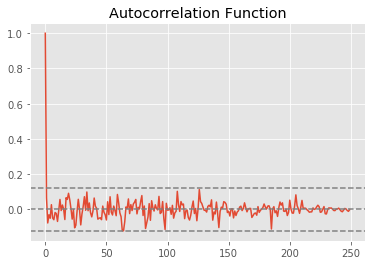

In [4]:
plt.figure(1)
plt.plot(ACF)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(final)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(final)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

### Second plot: ARIMA aplication to log returns Predicted (blue) vs Actual (red)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5,1,'RSS: Predicted vs Actual')

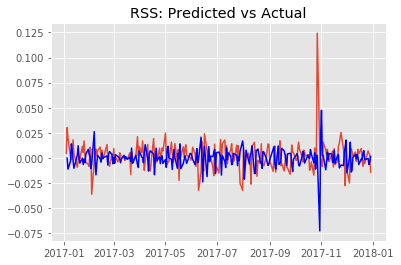

In [5]:
#predicted vs actual using ARIMA 2,1,0
plt.figure(2)
model = ARIMA(final, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(final)
plt.plot(results_AR.fittedvalues, color='blue')
plt.title('RSS: Predicted vs Actual')
